# <span style="color:darkorange"> Exercises 06 (NSL) </span>
# <span style="color:darkorange"> 06.1: 1D Ising model </span>

* **Method 1:** <font color="darkorange">Metropolis</font> sampling algorithm
* **Method 2:** <font color="darkorange">Gibbs</font> sampling algorithm

to sample the **Boltzmann's weight** $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to **restart** from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:

1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.



- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with large enough blocks.

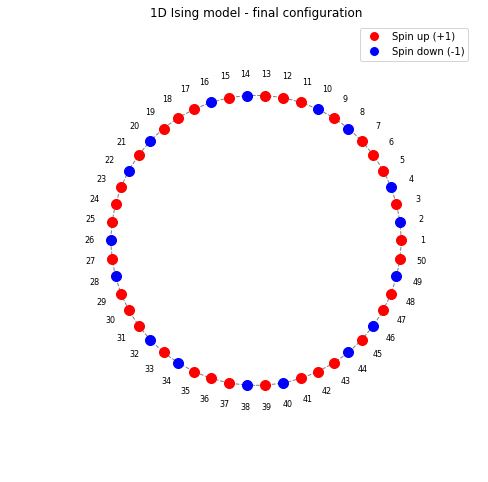

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read the configuration file
def read_config(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    return [int(line.strip()) for line in lines]

# Step 2: Generate positions in a circle
def generate_circle_positions(n):
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    x = np.cos(angles)
    y = np.sin(angles)
    return x, y

# Step 3: Draw the particles
def draw_particles(x, y, colors, labels):
    fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the figure size here
    ax.set_aspect('equal')
    
    # Set a radial offset for labels
    label_offset = 1.15  # Adjust this value to control the distance of labels from the center
    
    # Draw particles with labels
    for (xi, yi, color, label) in zip(x, y, colors, labels):
        ax.plot(xi, yi, 'o', color=color, markersize=10)
        
        # Calculate the position for the labels
        label_x = xi * label_offset
        label_y = yi * label_offset
        
        ax.text(label_x, label_y, label, color='black', ha='center', va='center', fontsize=8)
        
    # Draw circumference
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
    ax.add_artist(circle)
    
    # Set limits and title
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')
    ax.set_title('1D Ising model - final configuration')
    
    # Add legend
    red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Spin up (+1)', markerfacecolor='red', markersize=10)
    blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Spin down (-1)', markerfacecolor='blue', markersize=10)
    ax.legend(handles=[red_patch, blue_patch], loc='upper right')
    
    plt.show()

# Read configuration
config = read_config('sample_config.final')
colors = ['red' if val == 1 else 'blue' for val in config]
labels = [str(i + 1) for i in range(len(config))]

# Generate positions
x, y = generate_circle_positions(len(config))

# Draw particles with additional features
draw_particles(x, y, colors, labels)
